In [16]:
from models.model2 import CES
import numpy as np
from src.graph import draw_graph
from models.model2 import linear_multiplicative_cooling, linear_additive_cooling, logarithmic_multiplicative_cooling
import time
from memory_profiler import memory_usage

In [18]:
# ces = CES(
#     cooling_operator= linear_multiplicative_cooling(t_max= 300, alpha= 0.9), 
#     step_max = 300, 
#     t_min= 0, 
#     t_max= 300, 
#     ChromSize = 12
# )

# ces = CES(
#     cooling_operator= linear_additive_cooling(300, 0, 0.9, 300),
#     step_max = 300, 
#     t_min= 0, 
#     t_max= 300, 
#     ChromSize = 11
# )


ces = CES(
    cooling_operator= logarithmic_multiplicative_cooling(400, 0.8),
    step_max = 300, 
    t_min= 0, 
    t_max= 300, 
    ChromSize = 16
)

In [19]:
x0 = ces.nearestNeighborHeuristic(16)

In [20]:
r0 ,df = ces.decoding(x0, summary=True)

In [21]:
df

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,6,61.131007,1.528275,0,7,12.111560,2.888440
1,0,6,14,12.727922,0.318198,8,11,11.510166,0.601394
2,0,14,15,11.180340,0.279508,8,11,10.981895,0.528271
3,0,15,13,5.000000,0.125000,9,13,10.745645,0.236250
4,0,13,11,42.720019,1.068000,5,14,8.727124,2.018521
5,0,11,12,14.142136,0.353553,9,18,8.058908,0.668216
6,0,12,16,60.133186,1.503330,4,18,5.217615,2.841293
7,0,16,1,41.012193,1.025305,7,24,3.279789,1.937826
8,0,1,0,17.492856,0.437321,4,15,2.453251,0.826537
9,1,0,3,89.442719,2.236068,0,7,10.773832,4.226168


In [22]:
ces.objective_function(x0)

61.601799318021534

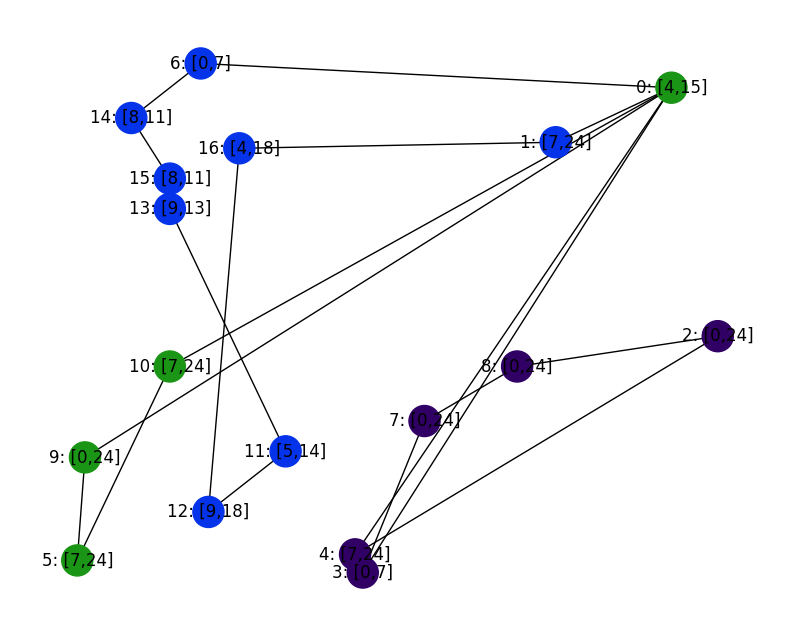

In [23]:
draw_graph(r0)

In [24]:

start_time = time.time()


ces.climatic_evolutionary_search(100, 16, 10, 20, 20)


elapsed_time = time.time() - start_time
print("Tiempo de ejecución:", elapsed_time, "segundos")


#mem_usage = memory_usage((ces.climatic_evolutionary_search, (50, 11, 2, 8, 20)))
#print("Uso de memoria máximo:", max(mem_usage), "MB")



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
Tiempo de ejecución: 39.93263244628906 segundos


In [25]:
ces.step

300

In [26]:
ces.draw_energy_plot()

In [27]:
ces.x_best.astype(int)

array([ 6, 14, 15, 13,  9,  5, 12, 11, 10, 16,  1,  2,  3,  4,  7,  8])

In [28]:
r, df = ces.decoding(ces.x_best.astype(int), summary=True)

In [29]:
ces.objective_function(ces.x_best.astype(int))

38.03916185577872

In [30]:
r

{0: [[0, 0],
  [6, 0],
  [14, 0],
  [15, 0],
  [13, 0],
  [9, 0],
  [5, 0],
  [12, 0],
  [11, 0],
  [10, 0],
  [16, 0],
  [1, 0],
  [0, 0]],
 1: [[0, 1], [2, 1], [3, 1], [4, 1], [7, 1], [8, 1], [0, 1]]}

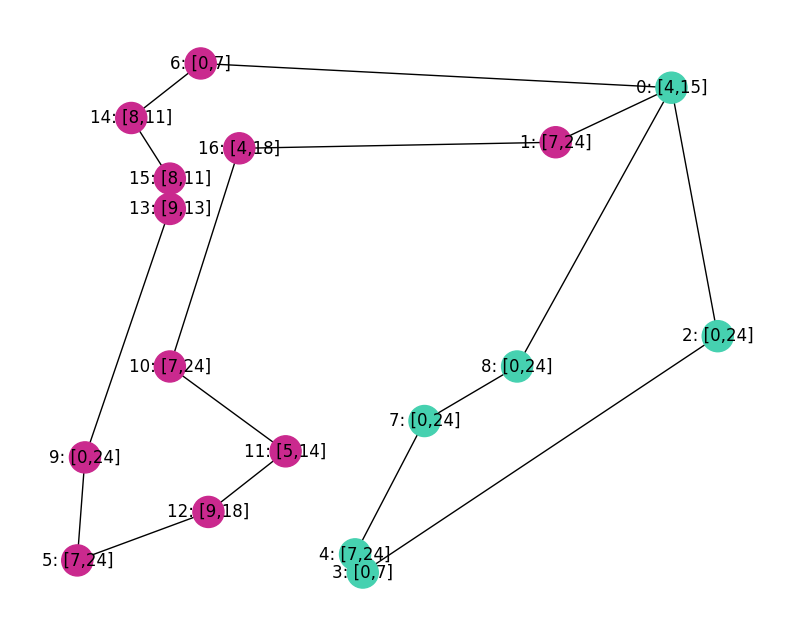

In [80]:

draw_graph(r)

In [83]:
df

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,6,61.131007,1.528275,0,7,12.111560,2.888440
1,0,6,14,12.727922,0.318198,8,11,11.510166,0.601394
2,0,14,15,11.180340,0.279508,8,11,10.981895,0.528271
3,0,15,13,5.000000,0.125000,9,13,10.745645,0.236250
4,0,13,9,42.449971,1.061249,0,24,8.739883,2.005761
5,0,9,5,17.029386,0.425735,7,24,7.935245,0.804639
6,0,5,12,18.788294,0.469707,9,18,7.047498,0.887747
7,0,12,11,14.142136,0.353553,5,14,6.379282,0.668216
8,0,11,10,20.518285,0.512957,7,24,5.409793,0.969489
9,0,10,16,37.107951,0.927699,4,18,3.656443,1.753351


In [81]:
filtered_df = df[(df['Nodoi-1'] != 0) & (df['Nodoi'] != 0)]

15 * filtered_df['Distancia'].sum() / 500

9.665880858889514

In [82]:
df['CO2'].sum()

23.266671814699606

In [37]:
realCO2 =  20.7
realCostTrans = 7.15256341712198
metaCostTrans = 8.6158
metaCO2 = 21.612845884242816 

diferenciaCO2 =  metaCO2 - realCO2
diferenciaCostTrans = metaCostTrans - realCostTrans 

print('Diferencia en costo de transporte =', diferenciaCostTrans)
print('Diferencia en costo de CO2 =', diferenciaCO2)

Diferencia en costo de transporte = 1.4632365828780198
Diferencia en costo de CO2 = 0.9128458842428167


In [38]:

A = [7,3,4,11,10,9,5,2,8,1,6]


r, df = ces.decoding(np.array(A), summary=True)

#6.  8.  2.  1.  3.  4.  5.  9. 10. 11.  7.
#6.  1.  8.  2.  3.  4. 10.  9.  5. 11.  7.
#3.  5.  9. 10. 11.  4.  7.  6.  8.  2.  1.
#[ 3.  4.  5.  9. 11.  8.  1.  6. 10.  7.  2.]

#[ 2.  3.  4.  7.  1.  6. 10.  5.  9. 11.  8.]

In [17]:
ces.objective_function(np.array(A))

40.78708314090964

In [18]:
df

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,7,63.631753,1.590794,0,24,11.993400,3.006600
1,0,7,3,26.248809,0.656220,0,7,10.753143,1.240256
2,0,3,4,3.162278,0.079057,7,24,10.603726,0.149418
3,0,4,11,19.235384,0.480885,5,14,9.694854,0.908872
4,0,11,10,20.518285,0.512957,7,24,8.725365,0.969489
5,0,10,9,18.601075,0.465027,0,24,7.846464,0.878901
6,0,9,5,17.029386,0.425735,7,24,7.041826,0.804639
7,0,5,2,90.873539,2.271838,0,24,2.748051,4.293775
8,0,2,0,41.436699,1.035917,4,15,0.790167,1.957884
9,1,0,8,50.159745,1.253994,0,24,12.629952,2.370048


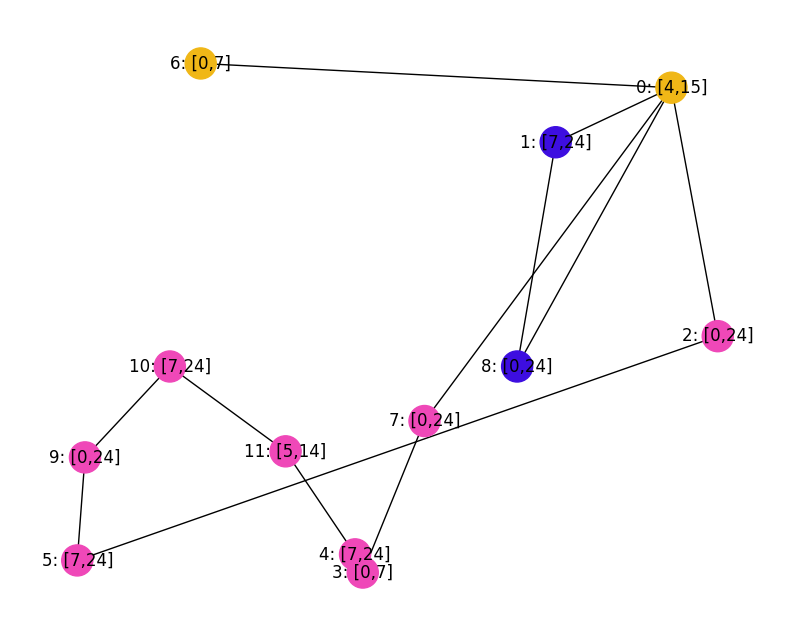

In [19]:
draw_graph(r)

In [19]:
r

{0: [[0, 0], [6, 0], [8, 0], [2, 0], [1, 0], [0, 0]],
 1: [[0, 1], [3, 1], [4, 1], [5, 1], [9, 1], [10, 1], [11, 1], [7, 1], [0, 1]]}

In [34]:
import numpy as np

In [808]:
def scrambledSubstring(chromosome_i: np.ndarray):
    chromosome = chromosome_i.copy()
    a = np.random.randint(0, chromosome.shape[0])
    b = np.random.randint(0, chromosome.shape[0])

    while True:
        b = np.random.randint(0, chromosome.shape[0])
        if a != b:
            break
    x = chromosome[a:b].copy()        
    np.random.shuffle(x)
    chromosome[a:b] = x
    return chromosome

In [576]:
def insertion(chromosome_i: np.ndarray):
    x = chromosome_i.copy()
    n = np.random.randint(1, x.shape[0]-2)
    m = np.random.randint(1, x.shape[0])

    while True:
        m = np.random.randint(0, x.shape[0])
        if  m > n:
            break
    return np.concatenate((x[:n],x[n+1:m],np.array([x[n]]),x[m:]))

In [578]:
def reverseSubstring(chromosome_i: np.ndarray):
    x = chromosome_i.copy()
    n = np.random.randint(1, x.shape[0]-2)
    m = np.random.randint(1, x.shape[0])

    while True:
        m = np.random.randint(n+1, x.shape[0])
        if  m > n:
            break
    print(n)
    print(m)
    print(x[:n])
    print(x[m:n-1:-1])
    print(x[m+1:])
    return np.concatenate((x[:n],x[m:n-1:-1] ,x[m+1:]))

In [579]:
x = np.array([1,2,3,4,5,6,7,8,9,10])

In [851]:
scrambledSubstring(x)

array([ 1,  2,  3,  4,  5,  7,  9,  8,  6, 10])

In [258]:
n = 4
m = 8


np.concatenate((x[:n],x[m:n-1:-1] ,x[m+1:]))

array([ 1,  2,  3,  4,  9,  8,  7,  6,  5, 10])

In [202]:
scrambledSubstring(x)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [1]:
41.44+61.13+17.49+26.48+3.16+19.24 +17.03+12.73+26.25+15+18.6+79.63+14.14+18.79+51.2+15.81 

438.12

In [2]:
15*438.12/500

13.143600000000001

In [3]:
26.48+3.16+19.24 +17.03+12.73+26.25+15+18.6+14.14+18.79+51.2+15.81

238.43

In [4]:
15*238.43/500

7.152900000000001